In [ ]:
#Import all the Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
#Loading the dataset
df = pd.read_csv('diabetic_data.csv')

#------------------- MAKING PREPROCESSED SPLIT INTO TRAINING AND TESTING SETS -------------------

#Replace all ? with NaN to handle better
df.replace('?', np.nan, inplace=True)

#remove useless columns
df.drop(['encounter_id', 'patient_nbr', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

#categorical and numerical columns
catCols= df.select_dtypes(include=['object']).columns
numCols = df.select_dtypes(include=['int64', 'float64']).columns

#Handle missing values using SimpleImputer, make imputers
catImputer = SimpleImputer(strategy='most_frequent')
numImputer = SimpleImputer(strategy='median')

#Apply the imputers
df[catCols] = catImputer.fit_transform(df[catCols])
df[numCols] = numImputer.fit_transform(df[numCols])

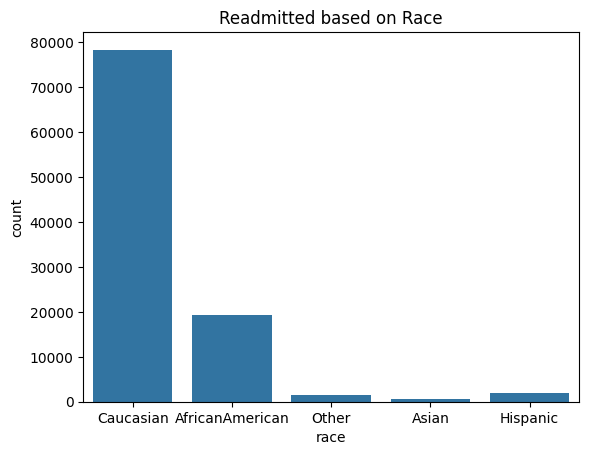

race
Caucasian          77.011969
AfricanAmerican    18.876639
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: proportion, dtype: float64
Training dataset ratio: (76324, 2338), Testing dataset ratio: (25442, 2338)


In [4]:
import seaborn as sns
#--------Make a graph showing the readmitted races---------
sns.countplot(x = df.race, data = df)
plt.title("Readmitted based on Race")
plt.show()
#Show the % for each column
print(df.race.value_counts(normalize=True)*100)


#Make every No and Yes in readmitted 0 and 1
df['readmitted'] = df['readmitted'].map({'NO':0, '>30':1, '<30':1}).fillna(0)

#Variables into binary columns for each category
df = pd.get_dummies(df, drop_first=True)

#Split into features X(size) and target y(target)
X = df.drop('readmitted', axis=1)
y = df['readmitted']

#Train-test split 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =66)

#Print the training and testing sets % for testing and sampling
print(f"Training dataset ratio: {X_train.shape}, Testing dataset ratio: {X_test.shape}")

In [17]:
#------------------FIRST LOGISTIC REGRESSION------------------
#Initialise logistic regression model
logisticModel = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, random_state =66))

#K-Fold Validation for Logistic Regression
logKscore = cross_val_score(logisticModel, X, y, cv=5)
print("K-Fold Validation Score: ", logKscore)


#train model
logisticModel.fit(X_train,y_train)

#Predict using test values
yPredict = logisticModel.predict(X_test)

K-Fold Validation Score:  [0.6113786  0.61602712 0.60516877 0.62595195 0.62113693]


In [16]:

print("------- Logisitic Regression -------")
#Measure overall accuracy for testing and training
score = logisticModel.score(X_train,y_train)
#Measure overall accuracy for testing and training
score = logisticModel.score(X_train,y_train)
print(" ")
print("Accuracy for Training score is: ", round(score, 3))
Tscore = logisticModel.score(X_test,y_test)
print("Accuracy for Testing score is: ", round(Tscore, 3))


------- Logisitic Regression -------
 
Accuracy for Training score is:  0.647
Accuracy for Testing score is:  0.625


In [7]:
#Prediction vs Actual Values
confusionMatrix = confusion_matrix(y_test,yPredict)
print(" ")
print("Confusion Matrix for Logistic Regression is below")
print(confusionMatrix)


 
Confusion Matrix for Logistic Regression is below
[[10029  3755]
 [ 5782  5876]]


In [8]:
#Classification Report
classification = classification_report(y_test, yPredict)
print(" ")
print("Classification Report for Logistic Regression is below")
print(classification)

 
Classification Report for Logistic Regression is below
              precision    recall  f1-score   support

           0       0.63      0.73      0.68     13784
           1       0.61      0.50      0.55     11658

    accuracy                           0.63     25442
   macro avg       0.62      0.62      0.61     25442
weighted avg       0.62      0.63      0.62     25442



In [9]:
#------------------SECOND RANDOM FOREST CLASSIFIER------------------
print("------- Random Forest Classifier -------")

rfModel = RandomForestClassifier(random_state =66)
rfModel.fit(X_train, y_train)
rfYpredict = rfModel.predict(X_test)

#Finding accuracies for testing and training
rfscore = rfModel.score(X_train, y_train)
print("Accuracy for Training score is: ", round(rfscore, 3))
rfTscore = rfModel.score(X_test, y_test)
print("Accuracy for Testing score is: ", round(rfTscore, 3))

------- Random Forest Classifier -------
Accuracy for Training score is:  1.0
Accuracy for Testing score is:  0.642


In [10]:
#Prediction vs Actual Values
rfconfusionMatrix = confusion_matrix(y_test,rfYpredict)
print("Confusion Matrix for Random Forest is ")
print(rfconfusionMatrix)

Confusion Matrix for Random Forest is 
[[10297  3487]
 [ 5612  6046]]


In [11]:
#Classification Report
rfclassification = classification_report(y_test, rfYpredict)
print("Classification Report for Random Forest is below")
print(rfclassification)

Classification Report for Random Forest is below
              precision    recall  f1-score   support

           0       0.65      0.75      0.69     13784
           1       0.63      0.52      0.57     11658

    accuracy                           0.64     25442
   macro avg       0.64      0.63      0.63     25442
weighted avg       0.64      0.64      0.64     25442



In [12]:
#------------------THIRD LINEAR SUPPORT VECTOR MACHINES------------------
print("------- Linear Support Vector Machines -------")

#initialised Linear Support Vector Machines 
sModel = LinearSVC(max_iter=2000, dual=False, random_state =66)
#K-fold validation for SVM
svmKscore = cross_val_score(sModel, X, y, cv=5)
print("K-Fold validation score for SVM is: ", svmKscore)

sModel.fit(X_train, y_train)
sYpredict = sModel.predict(X_test)

#Finding accuracies for testing and training
sscore = sModel.score(X_train, y_train)
print("Accuracy for Training score is: ", round(sscore, 3))
sTscore = sModel.score(X_test, y_test)
print("Accuracy for Testing score is: ", round(sTscore, 3))

------- Linear Support Vector Machines -------
K-Fold validation score for SVM is:  [0.61132947 0.61661671 0.6052179  0.6245271  0.62098953]
Accuracy for Training score is:  0.646
Accuracy for Testing score is:  0.626


In [13]:
#Prediction vs Actual Values for Support Vector Machines
sconfusionMatrix = confusion_matrix(y_test,sYpredict)
print("Confusion Matrix for Linear SVM is ")
print(sconfusionMatrix)

Confusion Matrix for Linear SVM is 
[[10117  3667]
 [ 5848  5810]]


In [14]:
#Classification Report for Support Vector Machines
sclassification = classification_report(y_test, sYpredict)
print("Classification Report for Linear SVM is below")
print(sclassification)

Classification Report for Linear SVM is below
              precision    recall  f1-score   support

           0       0.63      0.73      0.68     13784
           1       0.61      0.50      0.55     11658

    accuracy                           0.63     25442
   macro avg       0.62      0.62      0.61     25442
weighted avg       0.62      0.63      0.62     25442



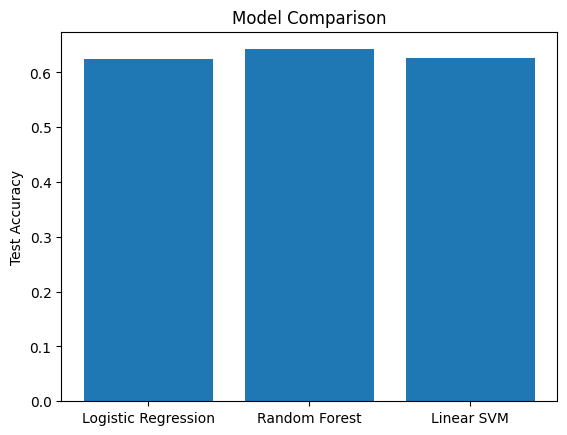

In [15]:
mlModels = ['Logistic Regression', 'Random Forest', 'Linear SVM']
testScores = [Tscore, rfTscore, sTscore]
plt.bar(mlModels, testScores)
plt.ylabel('Test Accuracy')
plt.title('Model Comparison')
plt.show()